In [1]:
import numpy as np
import os
import pandas as pd
import healpy as hp
import matplotlib.pyplot as plt
import loading_data as ld
import visualizing_funcs as vf
import calculations as calc
import storage_management as sm
from PIL import Image
from constants import *
from settings import *

In [2]:
#Find file with all data
filename = data_files_path + "/All_data_3D_temperature_17_dist_bins_nside_128.hdf5"

In [3]:
#Make new directories to store images

#This directory will contain images/files from this notebook
flagged_properties_path = image_path + '/Flagged_Properties' 
os.makedirs(flagged_properties_path, exist_ok=True)

#Make directory for images of high density regions
density_path = sm.join_path(flagged_properties_path, 'Density')

#Make directory for flagged regions based on temperature
temp_path = sm.join_path(flagged_properties_path, 'Temperature')

Directory  /fs/lustre/cita/molinaca/Images/Flagged_Properties/Density  already exists.
Directory  /fs/lustre/cita/molinaca/Images/Flagged_Properties/Temperature  already exists.


Define variables and maps to use

In [4]:
#Load data from file
data_dict = ld.load_3D_temperature_data(filename)

#define needed variables for later
dEBV = data_dict['dEBV']
nside = hp.get_nside(dEBV[0])
Ts = data_dict['temperatures']
n_distslices = data_dict['nr_of_distance_bins']
distslices = data_dict['distance_slices']




## Density

In this I flag high density regions (anything with a dEBV above 1). 

Then with the flag_regions function go through these pixels, any pixels around it in a radius (using hp.query_disc) 
that are above a secondary threshold are included in that region. These points are then compared to the actual dEBV map 
for a few LMCs. 

In [5]:
#Get dEBV and clip negative values
dEBV = np.clip(dEBV, 0, None)

In [6]:
#Plot dEBV
#vf.plot_dEBV(data_dict)

In [7]:
#Just plot high density pixels, just for visualizing

# primary_threshold = 0.7

# for ds_index in range(n_distslices):
#     # Create an array that is True when density is above threshold, False otherwise
    
#     binary_mask = dEBV[ds_index] > primary_threshold
    
#     # Create an empty map for high-density regions
#     high_density_map = np.zeros_like(dEBV[ds_index])
    
#     # Make locations where binary mask is True have the value of dEBV, otherwise 0 (from intialization)
#     high_density_map[binary_mask] = dEBV[ds_index][binary_mask]
    
#     # Visualize the high-density regions
#     hp.mollview(high_density_map, title=f'High density regions slice {ds_index}', nest=True, cbar=True)
#     plt.show()

flag_regions will output a list of dictionaries that contain the region center, the pixels within it, and their values for each distance slice. 

The region centers are overplotted the dEBV map, and the the pixels that were selected by the flagging function are plotted on their own. 

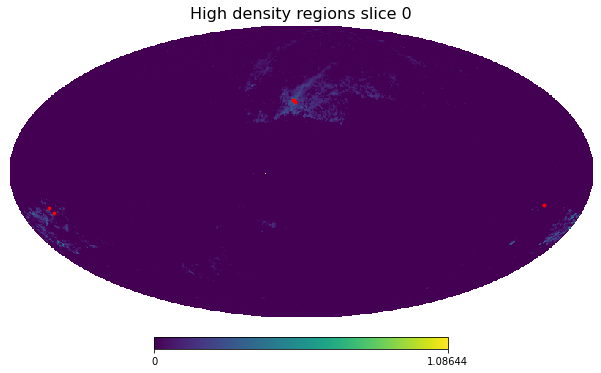

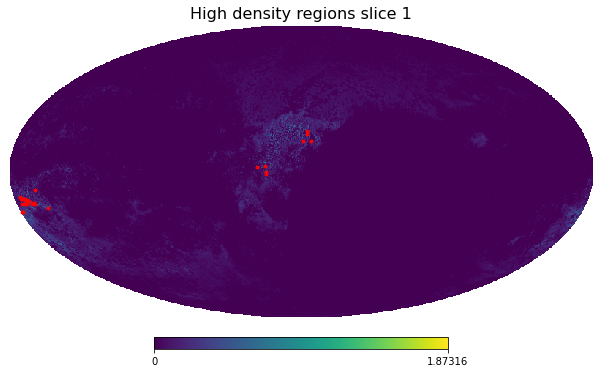

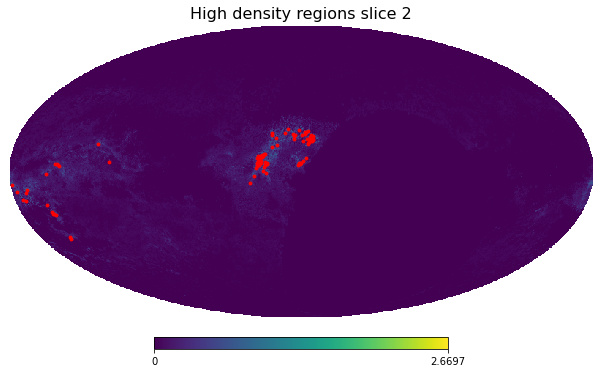

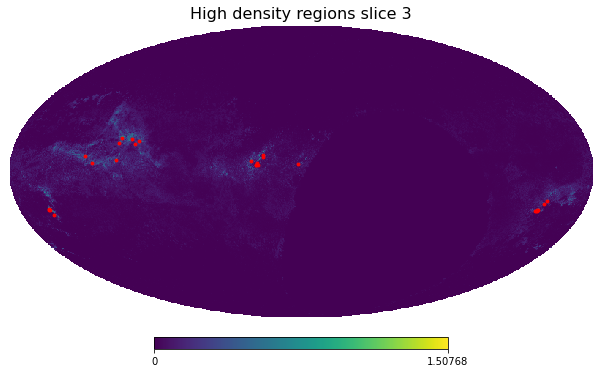

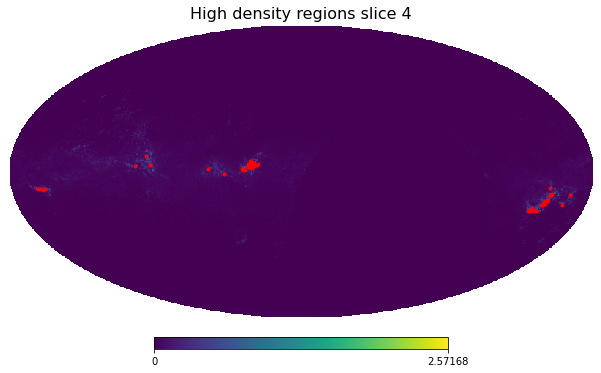

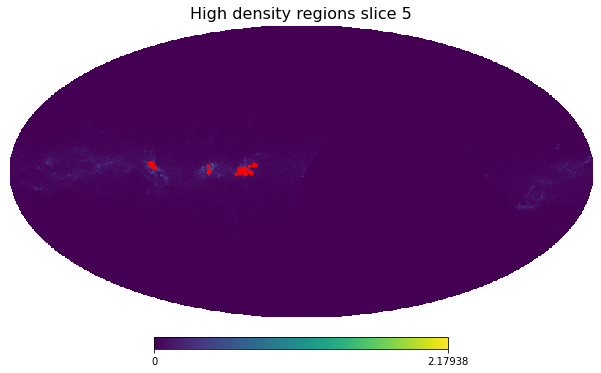

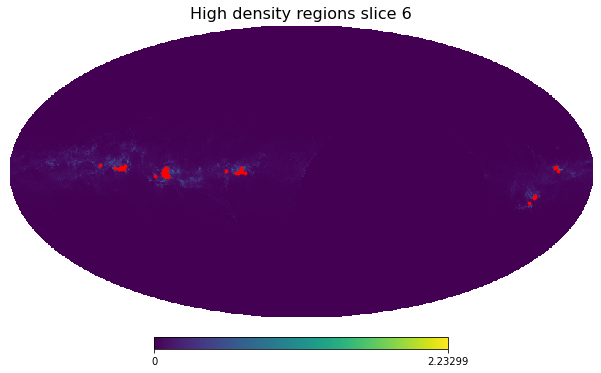

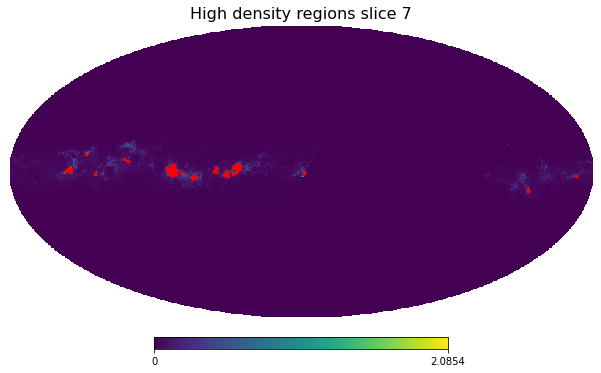

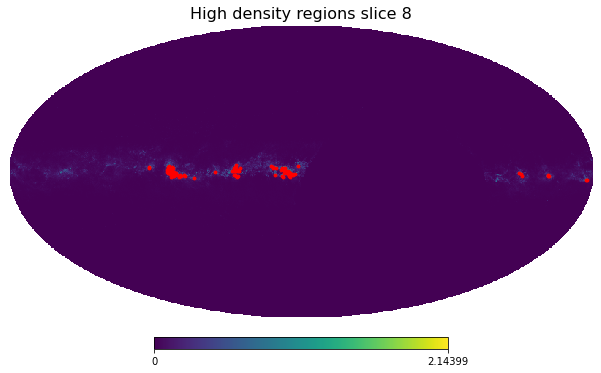

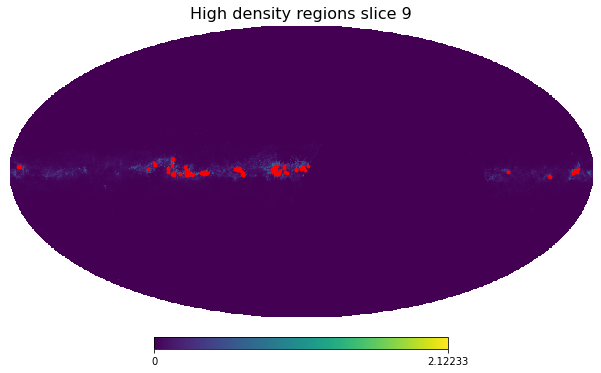

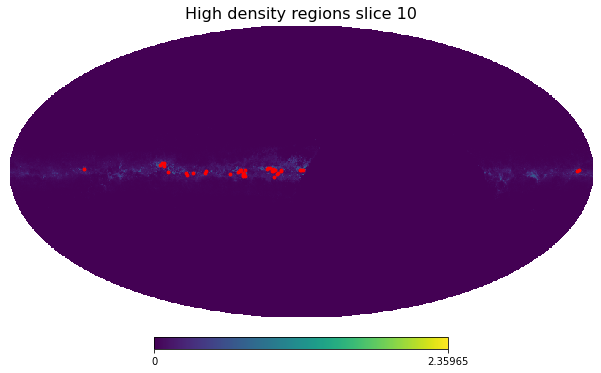

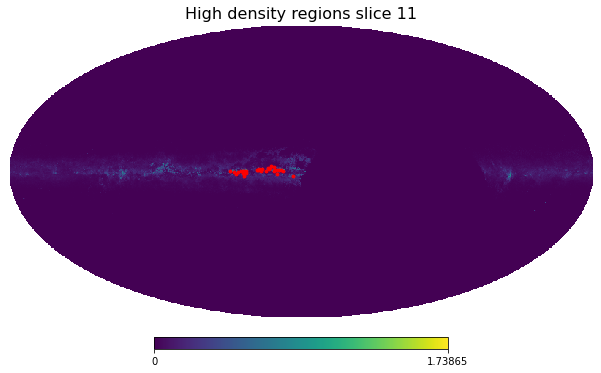

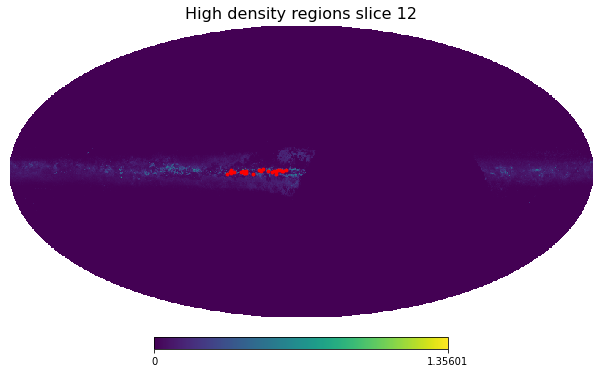

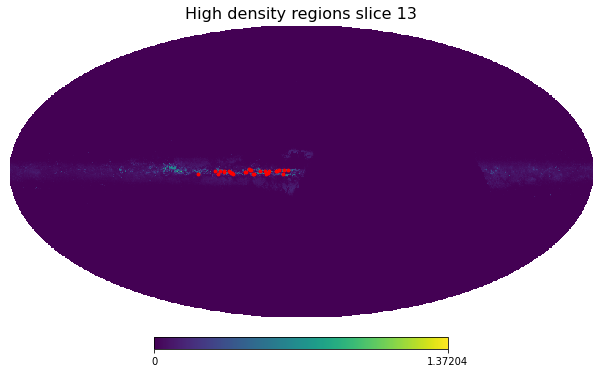

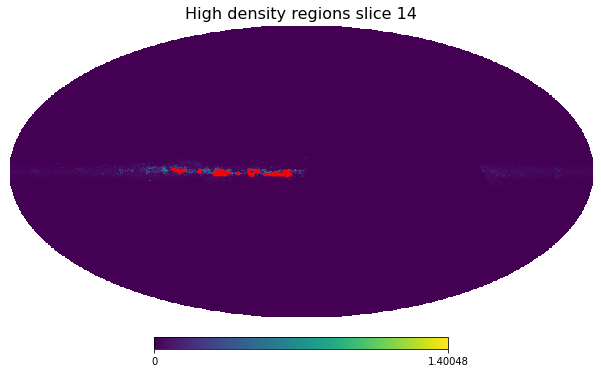

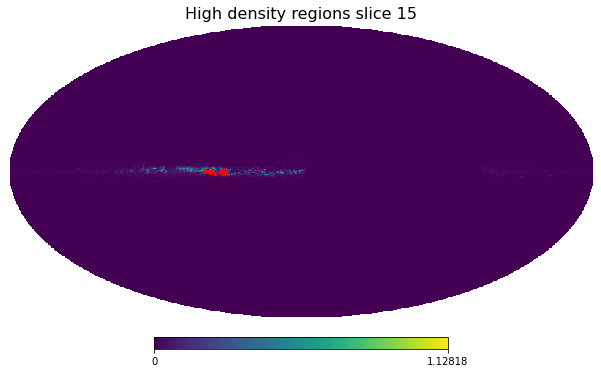

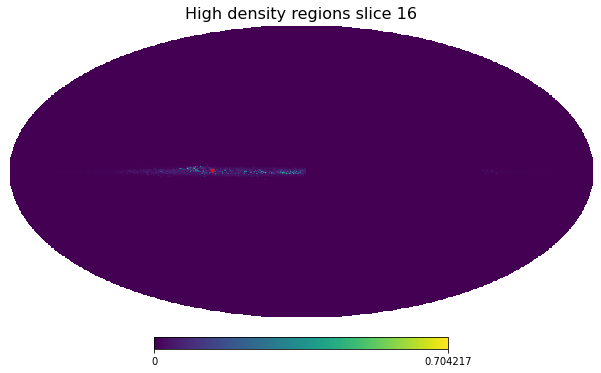

In [8]:
#Instead of pixels get high density regions so that they can be marked on map

#Pick primary threshold (high density) and secondary threshold (medium density)
dEBV_primary_threshold = 1 
dEBV_secondary_threshold = 0.5 
dEBV_radius = 0.6 #radius around high density region to be considered as part of it, not a physical radius yet

#Get high density regions
highdEBV_info, highdEBV_maps = calc.flag_regions(nside, n_distslices, dEBV, dEBV_primary_threshold, dEBV_secondary_threshold, dEBV_radius)

#Plot region centers over regular dEBV map
vf.overplot_regions_mollview(highdEBV_info, dEBV, n_distslices)

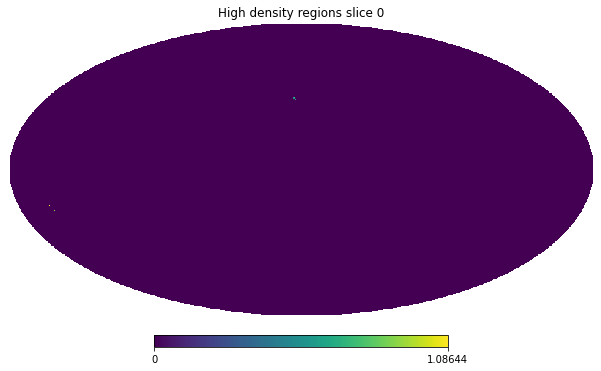

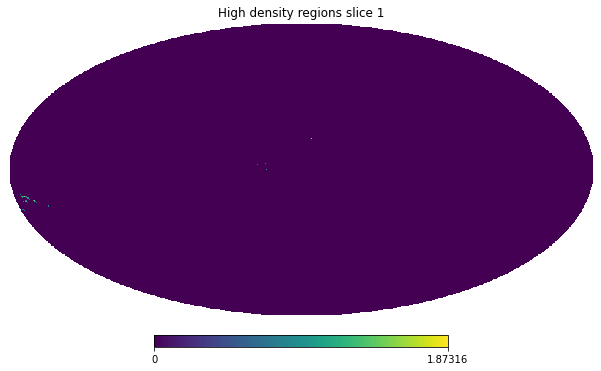

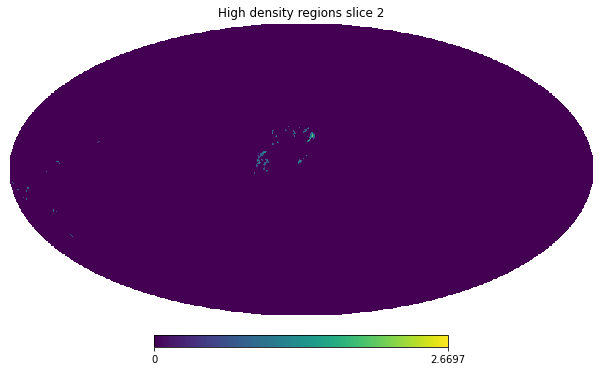

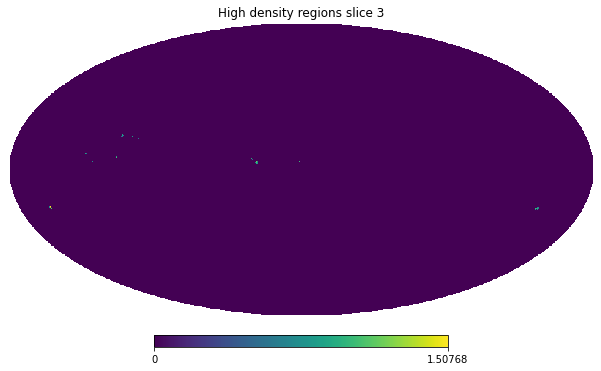

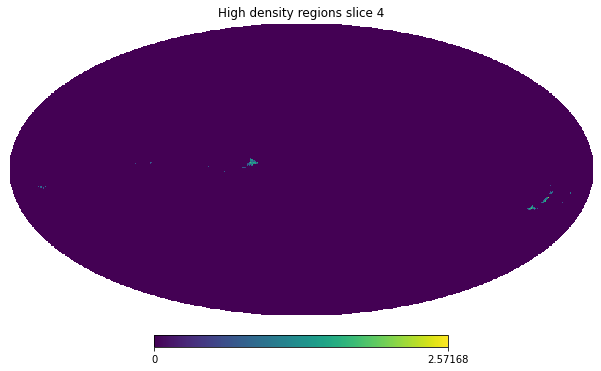

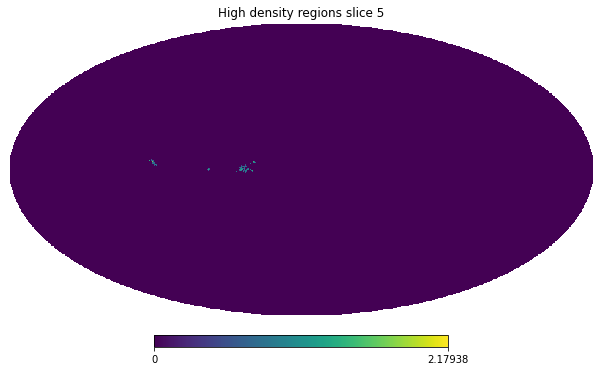

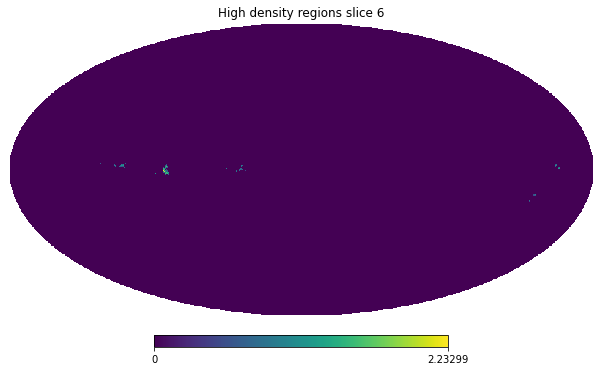

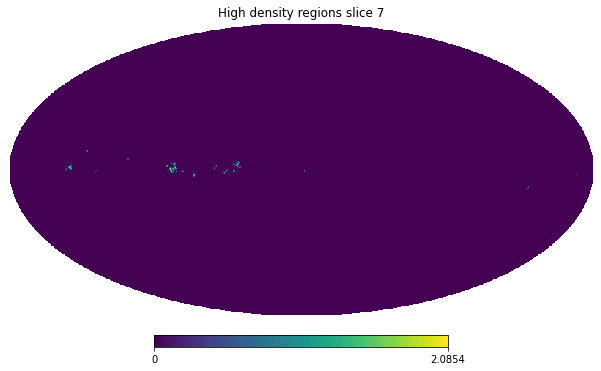

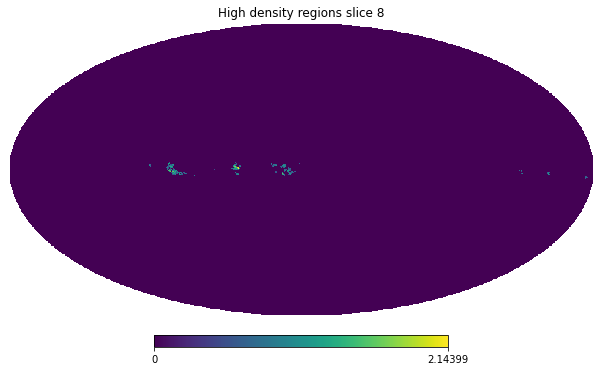

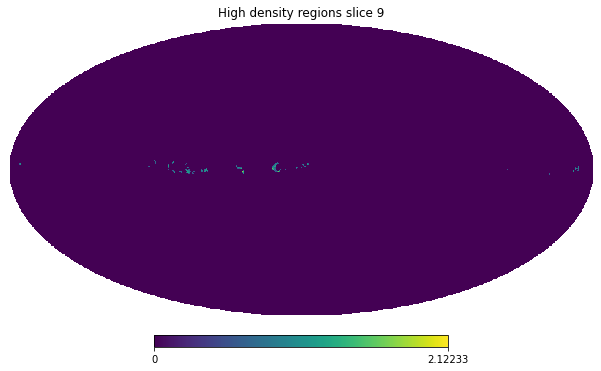

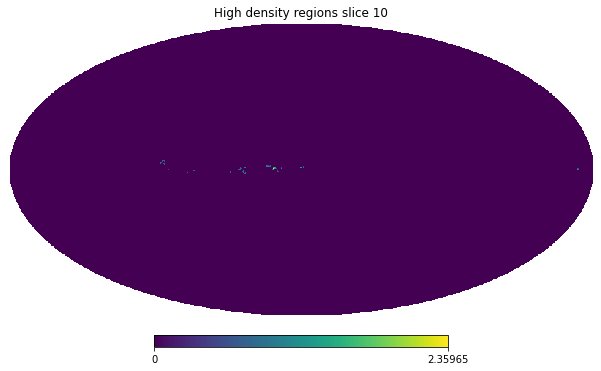

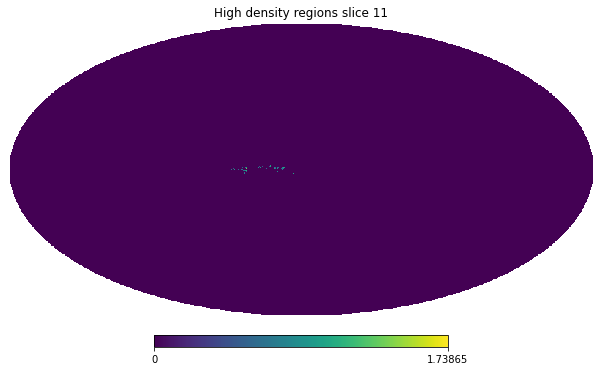

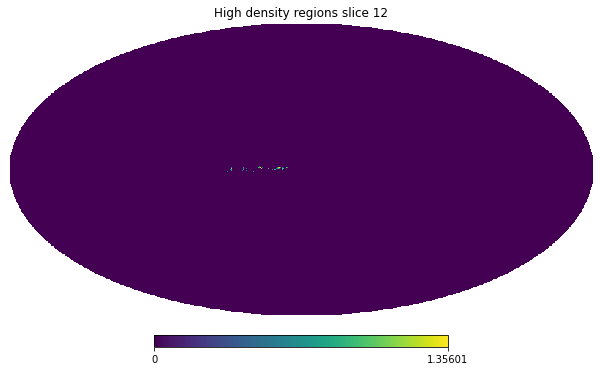

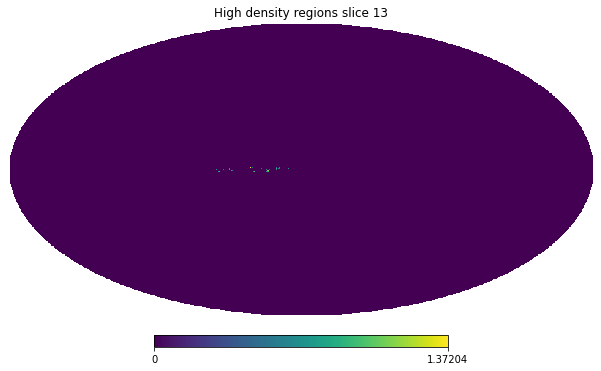

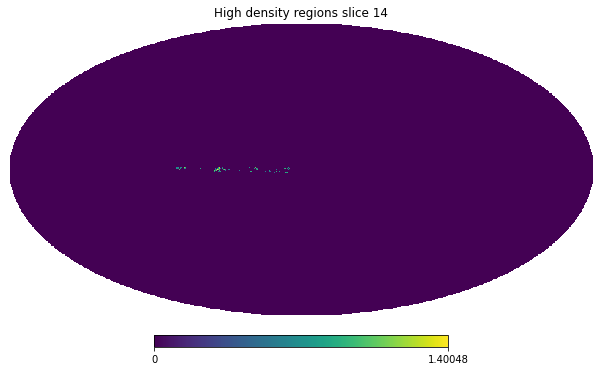

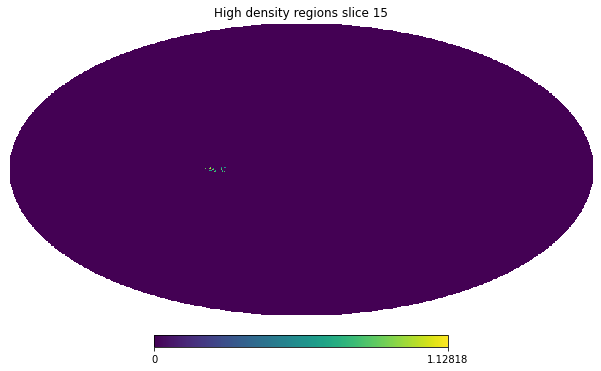

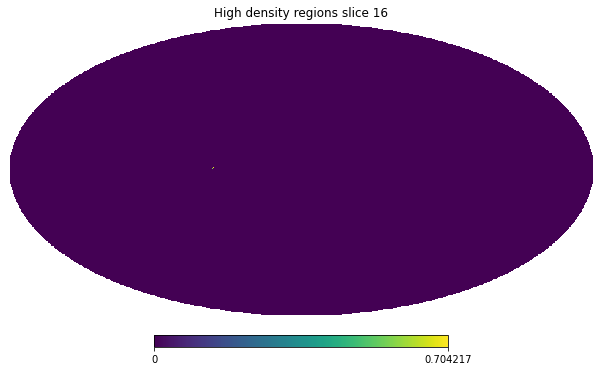

In [9]:
#Plot high density regions/pixels on their own.
for ds_index in range(n_distslices):
    hp.mollview(highdEBV_maps[ds_index], title=f'High density regions slice {ds_index}', nest=True, cbar=True)

In [10]:
#Checking number of regions in each distance slice
for ds_index in range(n_distslices):
    print(f"Number of regions in slice {ds_index}: {len(highdEBV_info[ds_index])}")

Number of regions in slice 0: 6
Number of regions in slice 1: 28
Number of regions in slice 2: 94
Number of regions in slice 3: 27
Number of regions in slice 4: 61
Number of regions in slice 5: 38
Number of regions in slice 6: 46
Number of regions in slice 7: 64
Number of regions in slice 8: 93
Number of regions in slice 9: 75
Number of regions in slice 10: 40
Number of regions in slice 11: 33
Number of regions in slice 12: 27
Number of regions in slice 13: 29
Number of regions in slice 14: 52
Number of regions in slice 15: 12
Number of regions in slice 16: 1


Compare region centers to the dEBV of each molecular cloud

overplot_region_gnomview does the same as the function used before, except for gnomview and not mollview. 

In [11]:
# Define Variables for regions of interest
dEBV_unit = 'dEBV'

orionA_dens_title = f'High density regions in Orion A at' + ' {:.2f}'.format(distslices[d_orion]) + 'kpc'
orionA_dens_file=density_path + '/OrionA.png'

orionB_dens_title = f'High density regions in Orion B at' + ' {:.2f}'.format(distslices[d_orion]) + 'kpc'
orionB_dens_file=density_path + '/OrionB.png'

cepheus_dens_title = f'High density regions in Cepheus at' + ' {:.2f}'.format(distslices[d_ceph]) + 'kpc'
cepheus_dens_file=density_path + '/Cepheus.png'

perseus_dens_title = f'High density regions in Perseus at' + ' {:.2f}'.format(distslices[d_perseus]) + 'kpc'
perseus_dens_file=density_path + '/Perseus.png'

#Plot the regions and save them, can be shown using show=True, but for now just shown in panel. 


vf.overplot_region_gnomview(highdEBV_info, dEBV, d_orion, rot=[l_orionA,b_orionA], title=orionA_dens_title, filename=orionA_dens_file, unit=dEBV_unit)
vf.overplot_region_gnomview(highdEBV_info, dEBV, d_orion, rot=[l_orionB,b_orionB], title=orionB_dens_title, filename=orionB_dens_file, unit=dEBV_unit)
vf.overplot_region_gnomview(highdEBV_info, dEBV, d_ceph, rot=[l_ceph,b_ceph], title=cepheus_dens_title, filename=cepheus_dens_file, unit=dEBV_unit)
vf.overplot_region_gnomview(highdEBV_info, dEBV, d_perseus, rot=[l_perseus,b_perseus], title=perseus_dens_title, filename=perseus_dens_file, unit=dEBV_unit)

In [12]:
#Take a look at what the regions maps look like on their own
orionA_densmap_title = 'High Density Region Maps of Orion A at'+' {:.2f}'.format(distslices[d_orion]) + 'kpc'
orionB_densmap_title = 'High Density Region Maps of Orion B at'+' {:.2f}'.format(distslices[d_orion]) + 'kpc'
ceph_densmap_title = 'High Density Region Maps of Cepheus at'+' {:.2f}'.format(distslices[d_ceph]) + 'kpc'
perseus_densmap_title = 'High Density Region Maps of Perseus at'+' {:.2f}'.format(distslices[d_perseus]) + 'kpc'

#Orion A and B
hp.gnomview(highdEBV_maps[d_orion], rot=[l_orionA, b_orionA], nest=True, title=orionA_densmap_title, cbar=True, notext=True, unit=dEBV_unit)
plt.title(orionA_densmap_title, fontsize=16)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(density_path + '/OrionA_map.png')
plt.close()

hp.gnomview(highdEBV_maps[d_orion], rot=[l_orionB, b_orionB], nest=True, title=orionB_densmap_title, cbar=True, notext=True, unit=dEBV_unit)
plt.title(orionB_densmap_title, fontsize=16)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=15)
plt.savefig(density_path + '/OrionB_map.png')
plt.close()

#Cepheus
hp.gnomview(highdEBV_maps[d_ceph], rot=[l_ceph, b_ceph], nest=True, title=ceph_densmap_title, cbar=True, notext=True, unit=dEBV_unit)
plt.title(ceph_densmap_title, fontsize=16)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=15)
plt.savefig(density_path + '/Cepheus_map.png')
plt.close()

#Perseus
hp.gnomview(highdEBV_maps[d_perseus], rot=[l_perseus, b_perseus], nest=True, title=perseus_densmap_title, cbar=True, notext=True, unit=dEBV_unit)
plt.title(perseus_densmap_title, fontsize=16)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=15)
plt.savefig(density_path + '/Perseus_map.png')
plt.close()


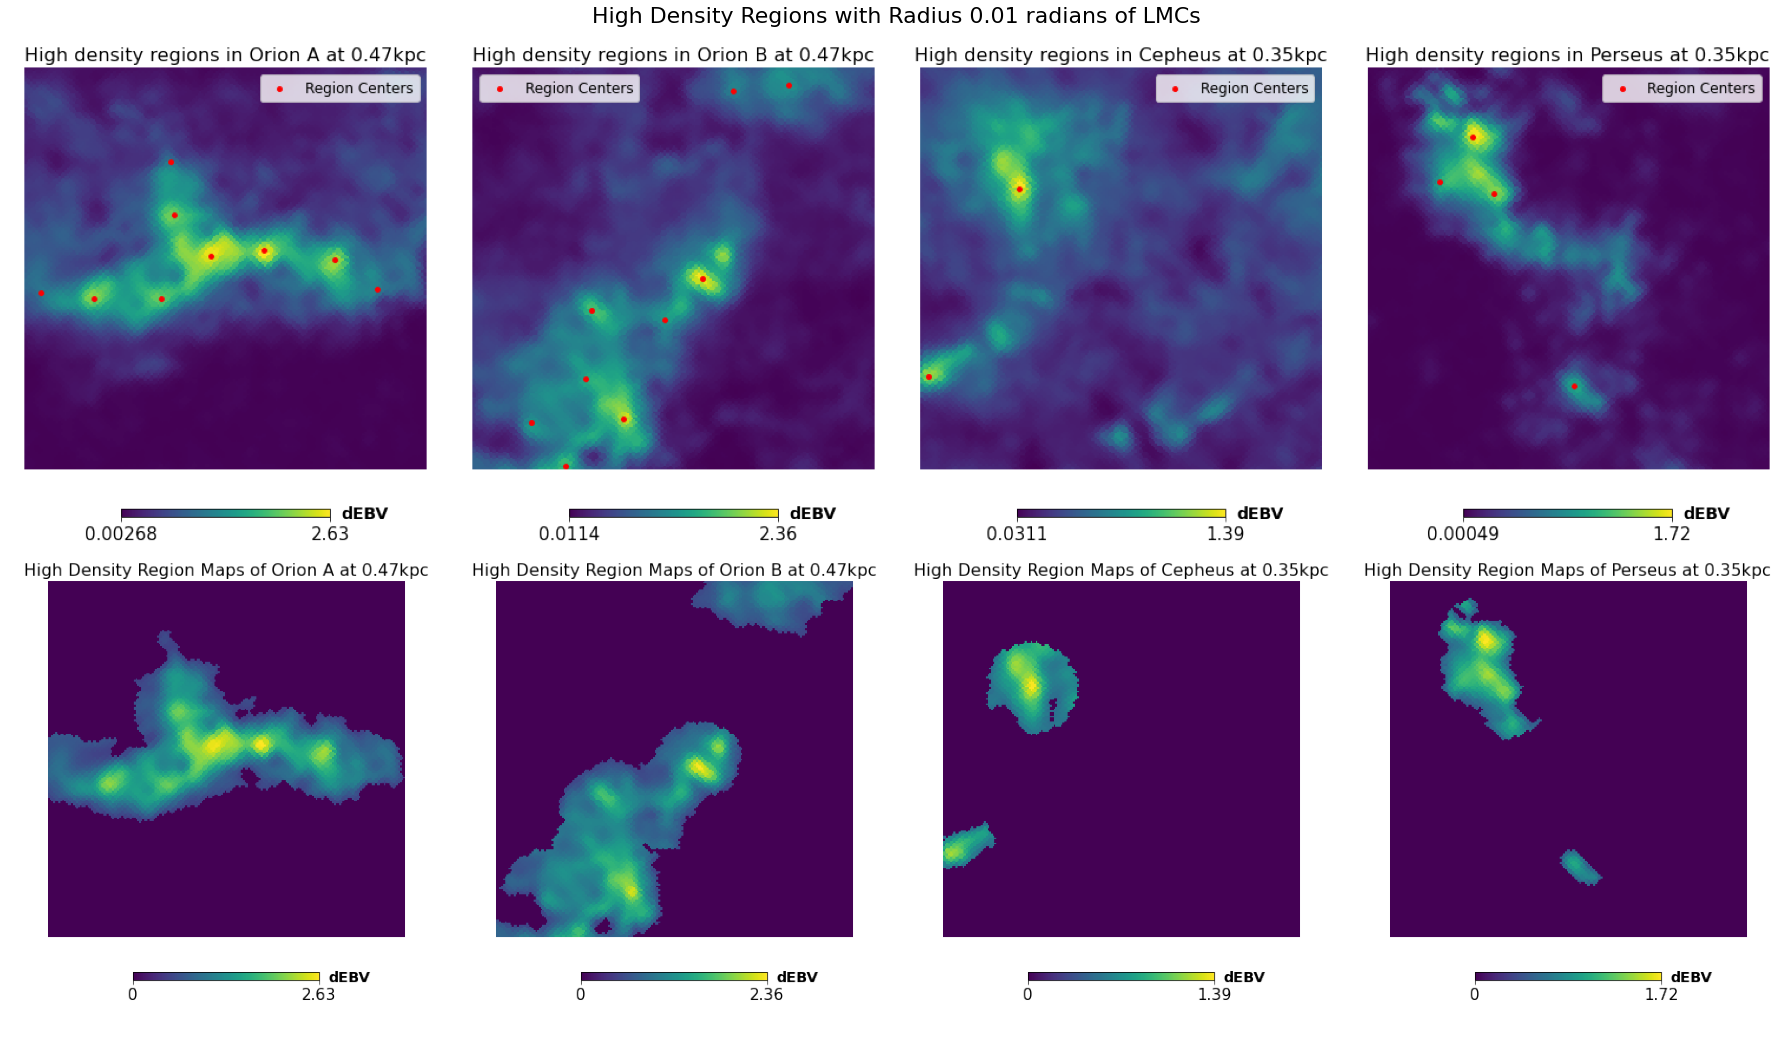

In [13]:
#Create a panel of all the high density region images

dEBV_imgs = ['OrionA', 'OrionB', 'Cepheus', 'Perseus', 'OrionA_map', 'OrionB_map', 'Cepheus_map', 'Perseus_map']
dEBV_panel_save = density_path + '/HighdEBV_panel.png'
dEBV_panel_title = 'High Density Regions with Radius ' + '{:.2f}'.format(np.radians(dEBV_radius)) + ' radians of LMCs'
vf.create_panel([2,4], (25,15), density_path, dEBV_imgs, dEBV_panel_title, filename = dEBV_panel_save)

In [14]:
#Can use this to filter regions but not really necessary
#orion_regions, orion_regions_all = calc.get_region_maps(region_info, nside, d_orion, filter=True, rot=[l_orionA, b_orionA], radius = 0.2, combine=True)
#hp.mollview(orion_regions_all, title='Orion A Region', nest=True, cbar=True)

## Temperature

Another property we can flag is cold and hot temperature. To do this, we can use the method used to obtain the RGB channels from 2D_RGBmap.ipynb

RGB channels can encode the temperature of the sky where there is dust (since it is obtained from the density x temperature map) 

The step by step process to do this is:
- Get temperature midpoints for RGB and frequency at these points
- Pick desired method to represent these temperatures (in my case a Gaussian Function)
- Multiply dEBV by this new map and normalize it
- Convert new map into uint8 

High red --> Cold Dust
High Blue --> Hot Dust

In [19]:
#Have to increase size of temperature map to match dEBV map

Ts_new = calc.increase_temp_res(data_dict, 1024)
pixels = len(Ts_new[0]) #Get number of pixels


In [20]:
#Get RGB channels

#Get T midpoints and get frequency using Wien's Law
T = [10, 18.8, 30]
frequency = np.zeros(3)

for i in range(len(T)):
    frequency[i] = calc.WiensLaw(T[i])

#Will use gaussian function so need fwhm (= sigma G)
sigma_G = 2
windowed_T = np.zeros((n_distslices, len(frequency), len(Ts_new[0]))) #Will store new maps at each frequency/color

#Have to iterate it over each distance slice
for ds_index in range(n_distslices):
    windowed_T[ds_index] = calc.get_temptracers_at_freq(Ts_new[ds_index], method='gauss', midpoints = T, sigma_G=sigma_G)

windowed_T = np.transpose(windowed_T, (1,0,2)) #Tranpose so that it is of format that next functions expect

#If want to use stepfunc: windowed_T = calc.get_temptracers_at_freq(Ts_new, method='step', limits = [16,19])

#Multiply and normalize arrays
dens_ttracer = calc.multiply_dEBVandTtracer(data_dict, dEBV, windowed_T, frequency)
dens_ttracer_norm = calc.normalize_multiplied_array(data_dict, dens_ttracer, frequency)

#Convert to uint8 and output RGB arrays
R, G, B = calc.get_RGB(dens_ttracer_norm)
#Make image brighter
brightness_factor = 5
R, G, B = vf.brighten_image(R, brightness_factor), vf.brighten_image(G, brightness_factor), vf.brighten_image(B, brightness_factor)


In [21]:
#Get RGB images of Orion A and B

#get_region_image merges RGB channels so that one image is produced, and outputs individual RGB within a gnomview image

R_orionA, G_orionA, B_orionA, RGB_orionA = vf.get_region_image(R, G, B, d_orion, l_orionA, b_orionA, 200, 200, scale=True)
RGB_orionA.save(temp_path + '/OrionA_RGB.png')

R_orionB, G_orionB, B_orionB, RGB_orionB = vf.get_region_image(R, G, B, d_orion, l_orionB, b_orionB, 200, 200, scale=True)
RGB_orionB.save(temp_path + '/OrionB_RGB.png')


In [28]:
#Flag high red(cold) and high blue(hot) regions
blue_region_info, blue_region_maps = calc.flag_regions(nside, n_distslices, B, 180, 80, 0.8)
red_region_info, red_region_maps = calc.flag_regions(nside, n_distslices, R, 180, 80, 0.8)

#Since looking at a region (Orion A and B), overplot region centers on dEBV gnomview map
blue_unit = 'B'
red_unit = 'R'

orionA_blue_title = 'High $T$ Regions in Orion A at ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc'
orionA_blue_file = temp_path + '/OrionA_blue.png'
orionA_red_title = 'Low $T$ Regions in Orion A at ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc'
orionA_red_file = temp_path + '/OrionA_red.png'

vf.overplot_region_gnomview(blue_region_info, B, d_orion, rot=[l_orionA,b_orionA], title=orionA_blue_title, filename=orionA_blue_file, unit=blue_unit)
vf.overplot_region_gnomview(red_region_info, R, d_orion, rot=[l_orionA,b_orionA], title=orionA_red_title, filename=orionA_red_file, unit=red_unit)

#Can also plot them over dEBV maps to compare
#Code to plot B over dEBV: vf.overplot_region_gnomview(blue_region_info, dEBV, d_orion, rot=[l_orionA,b_orionA], title='High blue regions in Orion A', filename=temp_path + '/OrionA_blue_dEBV.png', unit='dEBV')
#Code to plot R over dEBV: vf.overplot_region_gnomview(red_region_info, dEBV, d_orion, rot=[l_orionA,b_orionA], title='High red regions in Orion B', filename=temp_path + '/OrionA_red_dEBV.png', unit='dEBV')

Now that we have the flagged hot and cold regions, we can see how close they are to eachother by plotting them over the same plot. 

Then we can flag the hot and cold regions that are close to one another. These are found in find_close_RandB, where if a cold region is within a certain distance from the hot region, the midpoint is taken and classified as a region where there is both hot and cold dust. 

In [39]:
#Initialize arrays to store centers
blue_centers = []
red_centers = []

distance_threshold = 0.01 #threshold for distance between R and B regions to be considered close to eachother
close_RandB = [] #will store close R and B regions at each distance slice

#Get blue region centers, red region centers, and regions where the flagged R and B regions are close to eachother
for ds_index in range(n_distslices):
    #Get center at distance slice and append it
    blue_centers_atdist = np.array([region['center'] for region in blue_region_info[ds_index]])
    red_centers_atdist = np.array([region['center'] for region in red_region_info[ds_index]])
    blue_centers.append(blue_centers_atdist)
    red_centers.append(red_centers_atdist)

    #Do same for close R and B regions
    close_RandB_atdist = calc.find_close_RandB(blue_centers_atdist, red_centers_atdist, distance_threshold)
    close_RandB.append(close_RandB_atdist)

#Now plot over the dEBV and temperature maps to see where the hot and cold regions are, and how they compare to temp and dEBV

orionA_RandB_dens_title = 'Hot and Cold Regions' + '\n' + ' in dEBV Map of Orion A at ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc'
orionA_RandB_temp_title = 'Hot and Cold Regions' + '\n' + ' in $T$ map of Orion A at ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc'
temp_unit = 'K'

#dEBV
hp.gnomview(dEBV[d_orion], rot=[l_orionA, b_orionA], xsize=200, ysize=200, nest=True, title=orionA_RandB_dens_title, cbar=True, notext=True, 
            unit=dEBV_unit)
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', edgecolor='black', linewidth = 0.5, marker='o', s=20)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', marker='o', s=20)
plt.title(orionA_RandB_dens_title, fontsize=16)
plt.legend(['Hot', 'Cold'], fontsize = 12)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(temp_path + '/OrionA_R&B.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

#temperature
hp.gnomview(Ts_new[d_orion], rot=[l_orionA, b_orionA], xsize=200, ysize=200, nest=True, title=orionA_RandB_temp_title, cbar=True, notext=True, 
            unit=temp_unit)
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', edgecolor='black', linewidth=0.5, marker='o', s=20)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', marker='o', s=20)
plt.title(orionA_RandB_temp_title, fontsize=16)
plt.legend(['Hot', 'Cold'], fontsize = 12)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(temp_path + '/OrionA_R&B_temp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

In [40]:
#Now plot neighbouring hot and cold regions

orionA_RandB_close_title = 'Neighbouring Hot and Cold Regions' + '\n' + ' in Orion A ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc'

hp.gnomview(dEBV[d_orion], rot=[l_orionA, b_orionA], xsize=200, ysize=200, nest=True, title=orionA_RandB_close_title, cbar=True, notext=True, 
            unit=dEBV_unit)
hp.projscatter(close_RandB[d_orion][:,0], close_RandB[d_orion][:,1], c='red', marker='o', s=20)
plt.title(orionA_RandB_close_title, fontsize=16)
plt.legend(['Hot and Cold Regions'], fontsize = 12)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(temp_path + '/OrionA_bothR&B.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

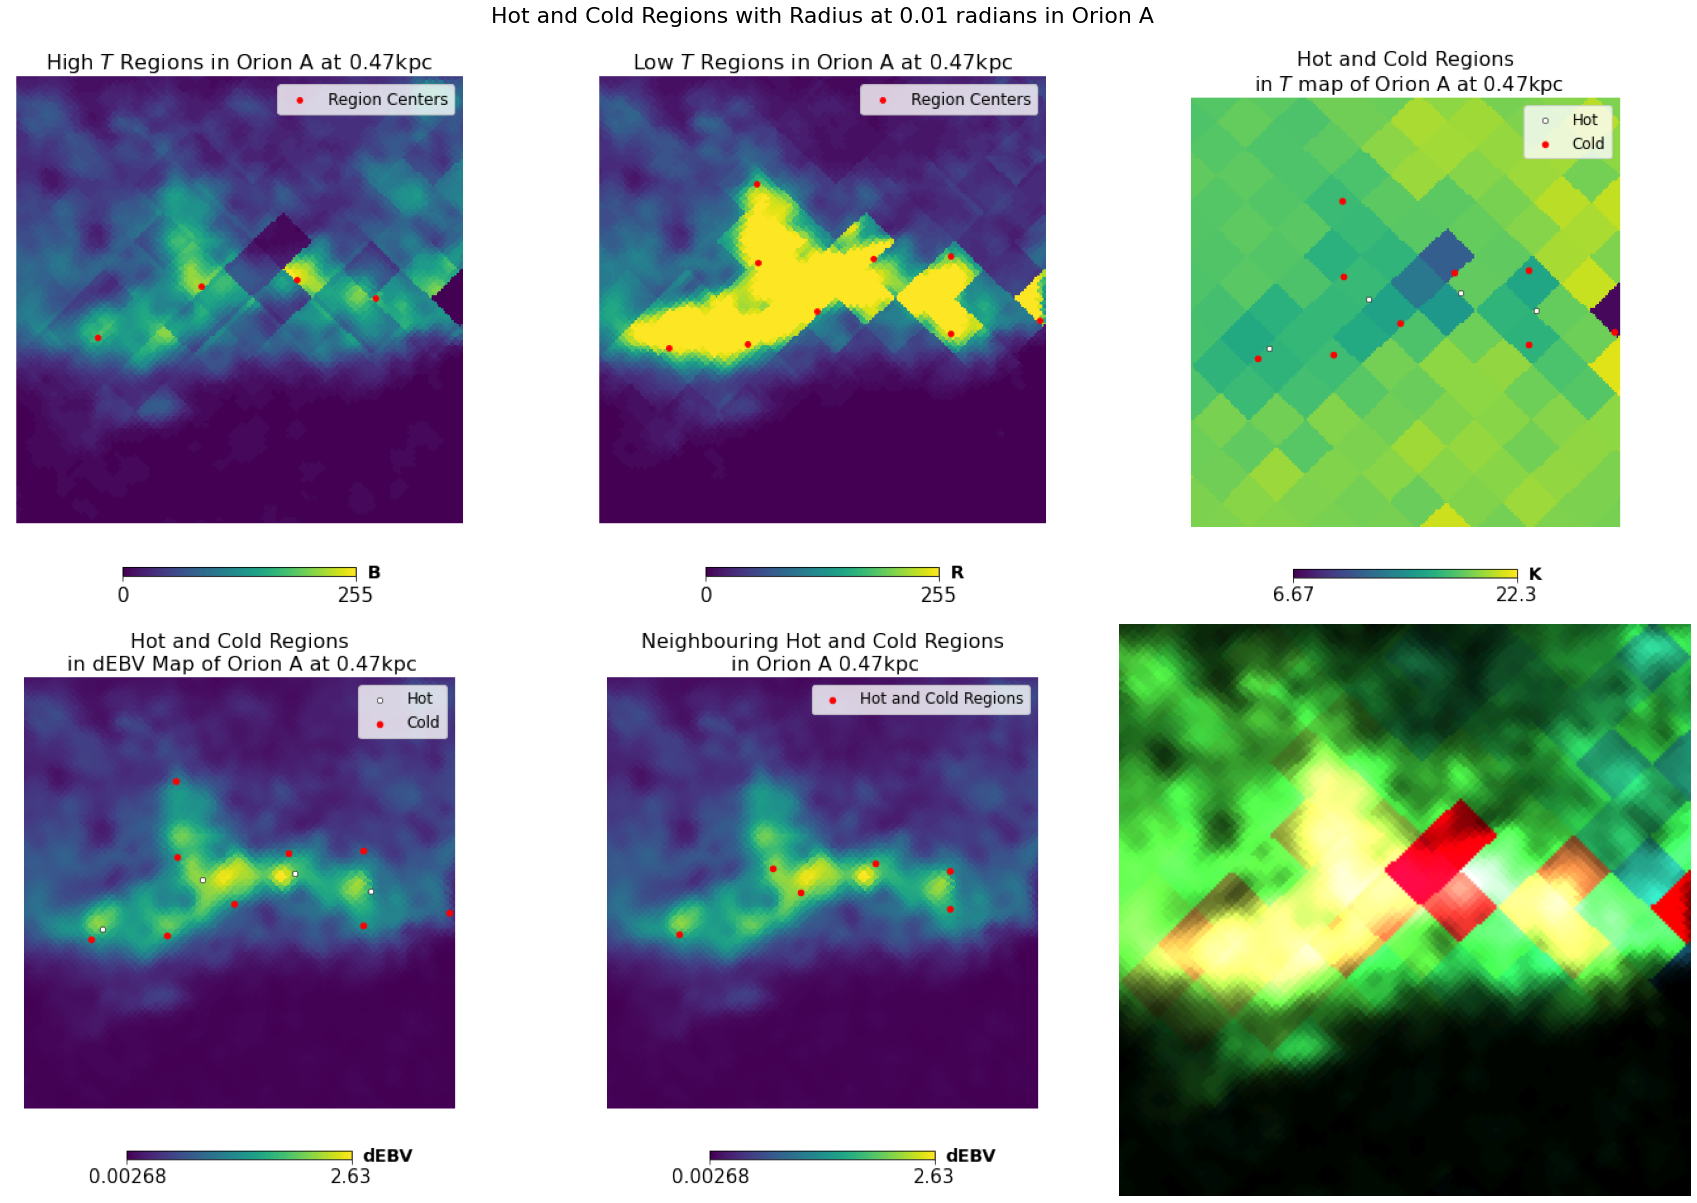

In [41]:
#Plot them in a panel like with density
\
orionA_temp_panel_title = 'Hot and Cold Regions with Radius at ' + '{:.2f}'.format(np.radians(0.8)) + ' radians in Orion A'

orionA_imgs = ['OrionA_blue', 'OrionA_red', 'OrionA_R&B_temp', 'OrionA_R&B', 'OrionA_bothR&B', 'OrionA_RGB']
orionA_panel_save = temp_path + '/OrionA_panel_gauss.png'
vf.create_panel([2,3], (25,17), temp_path, orionA_imgs, orionA_temp_panel_title, filename = orionA_panel_save)

In [50]:
#Now do same for Orion B

#Hot and Cold regions over Blue and Red maps
orionB_blue_title = 'High $T$ Regions in Orion B at ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc'
orionB_blue_file = temp_path + '/OrionB_blue.png'
orionB_red_title = 'Low $T$ Regions in Orion B at ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc'
orionB_red_file = temp_path + '/OrionB_red.png'

vf.overplot_region_gnomview(blue_region_info, B, d_orion, rot=[l_orionB,b_orionB], title=orionB_blue_title, filename=orionB_blue_file, unit=blue_unit)
vf.overplot_region_gnomview(red_region_info, R, d_orion, rot=[l_orionB,b_orionB], title=orionB_red_title, filename=orionB_red_file, unit=red_unit)


#Blue and Red over temperature and dEBV maps
orionB_RandB_temp_title = 'Hot and Cold Regions' + '\n' + ' in $T$ map of Orion B at ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc'
orionB_RandB_dens_title = 'Hot and Cold Regions' + '\n' + ' in dEBV map of Orion B at ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc'

hp.gnomview(Ts_new[d_orion], rot=[l_orionB, b_orionB], xsize=200, ysize=200, nest=True, title=orionB_RandB_temp_title, cbar=True, notext=True, 
            unit=temp_unit)
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white',edgecolor='black', linewidth=0.5, marker='o', s=20)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', marker='o', s=20)
plt.title(orionB_RandB_temp_title, fontsize=16)
plt.legend(['Hot', 'Cold'], fontsize = 12)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(temp_path + '/OrionB_R&B_temp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

hp.gnomview(dEBV[d_orion], rot=[l_orionB, b_orionB], xsize=200, ysize=200, nest=True, title=orionB_RandB_dens_title, cbar=True, notext=True, 
            unit=dEBV_unit)
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', edgecolor='black', linewidth=0.5, marker='o', s=20)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', marker='o', s=20)
plt.title(orionB_RandB_dens_title, fontsize=16)
plt.legend(['Hot', 'Cold'], fontsize = 12)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(temp_path + '/OrionB_R&B.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

#Plot neighbouring hot and cold regions
orionB_RandB_close_title = 'Neighbouring Hot and Cold Regions' + '\n' + ' in Orion B ' + '{:.2f}'.format(distslices[d_orion]) + 'kpc'
hp.gnomview(dEBV[d_orion], rot=[l_orionB, b_orionB], xsize=200, ysize=200, nest=True, title=orionB_RandB_close_title, cbar=True, notext=True, unit=dEBV_unit)
hp.projscatter(close_RandB[d_orion][:,0], close_RandB[d_orion][:,1], c='red', marker='o', s=20)
plt.title(orionB_RandB_close_title, fontsize=16)
plt.legend(['Hot and Cold Regions'], fontsize = 12)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(temp_path + '/OrionB_bothR&B.png', bbox_inches='tight', pad_inches=0.1)
plt.close()




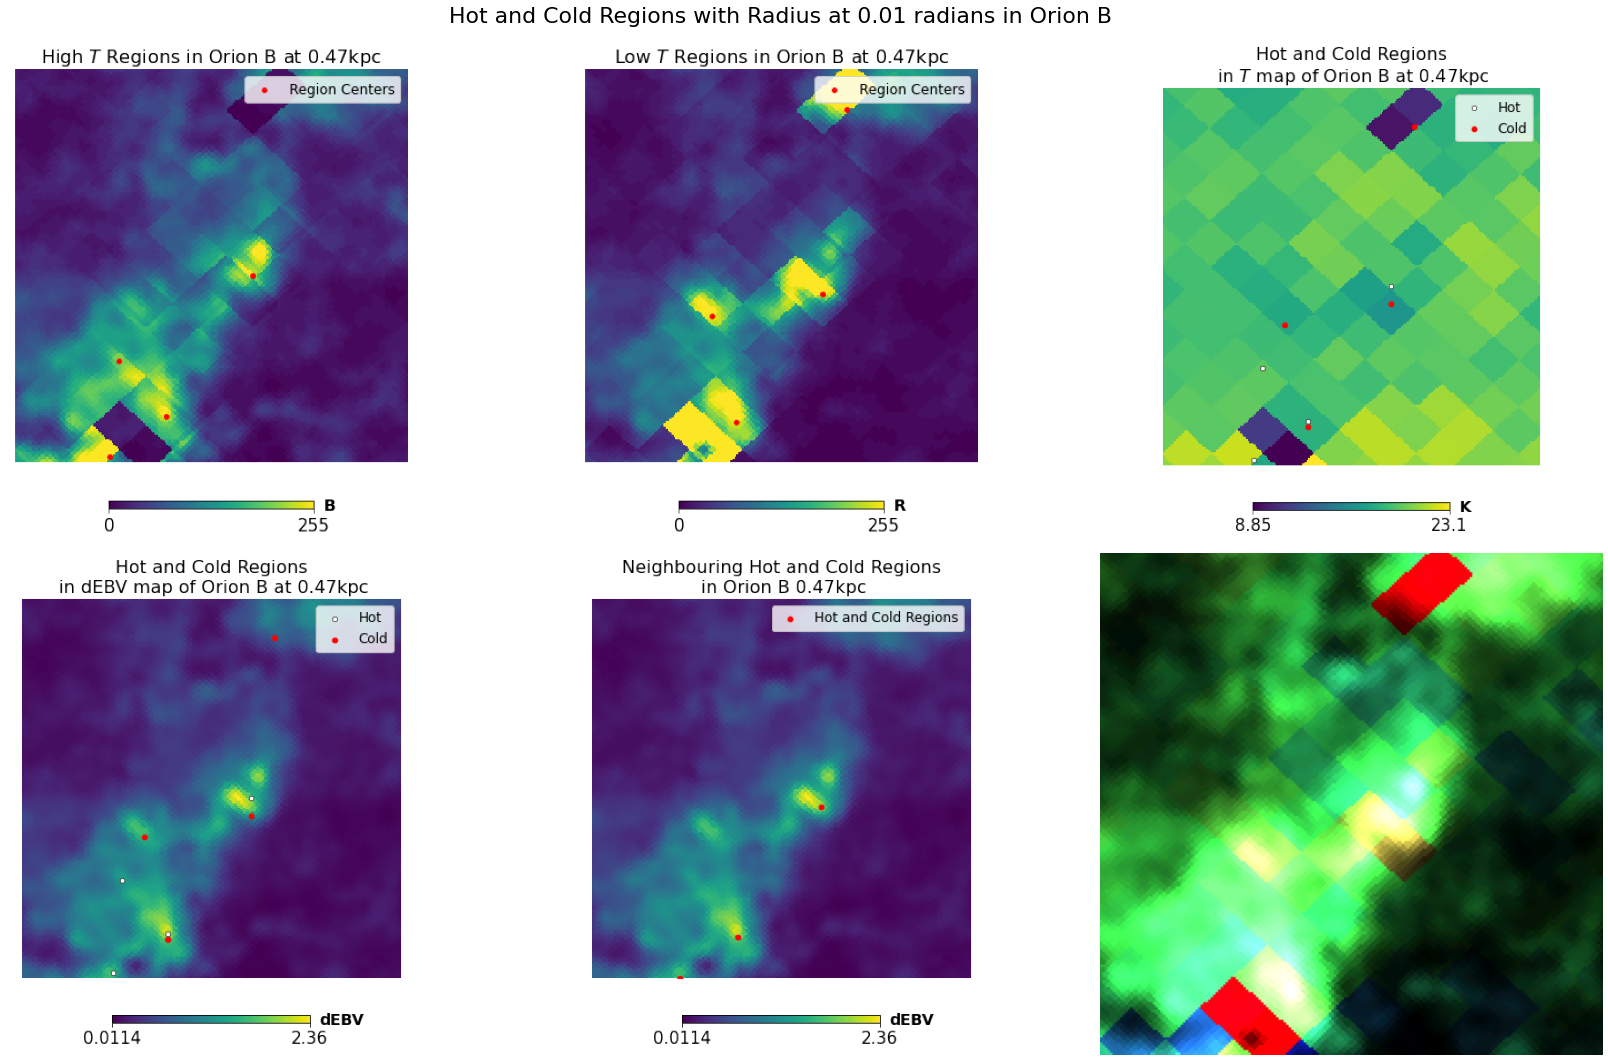

In [51]:
#Make panel for OrionB

orionB_temp_panel_title = 'Hot and Cold Regions with Radius at ' + '{:.2f}'.format(np.radians(0.8)) + ' radians in Orion B'
orionB_imgs = ['OrionB_blue', 'OrionB_red', 'OrionB_R&B_temp', 'OrionB_R&B', 'OrionB_bothR&B', 'OrionB_RGB']
orionB_panel_save = temp_path + '/OrionB_panel_gauss.png'
vf.create_panel([2,3], (25,15), temp_path, orionB_imgs, orionB_temp_panel_title, filename = orionB_panel_save)

## Making correlations with YSOs

Now we can overplot the location of KYSOs (only ones that are found near LMCs, Kuhn and Winston are not) of the LMCs to see how they correlate with flagged regions

In [47]:
#Get l and b at each distance slice

KYSOs = pd.read_csv(csv_files_path + '/KYSO_withdist.csv')
l_kysos, b_kysos, d_kysos = ld.get_tracer_positions(KYSOs)

#Assign objects to each distance slice
l_kysos_wdist, b_kysos_wdist = calc.assign_distance_slice(data_dict, l_kysos, b_kysos, d_kysos)

35 objects had distances out of range


In [48]:
#Make new path for images
YSOs_path = sm.join_path(flagged_properties_path, 'YSOs_Correlations')

Directory  /fs/lustre/cita/molinaca/Images/Flagged_Properties/YSOs_Correlations  already exists.


In [49]:
#Get centers for high density regions, note that we calculated it before but it was within an function that cannot be used for what I want to do

highdEBV_centers = []
for ds_index in range(n_distslices):
    highdEBV_centers_atdist = np.array([region['center'] for region in highdEBV_info[ds_index]])
    highdEBV_centers.append(highdEBV_centers_atdist)

We will compare the YSOs for Orion A, B and the Orion Ring. They will be compared to 3 things:
- High density regions
- Hot and cold regions individually
- Neighbouring hot and cold regions

In [58]:
#Make plots to make a panel

#Comparing with dEBV

orionA_ysos_x_dEBV_title = 'Comparing YSOs to High Density' + '\n' + ' Regions in Orion A at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc'
hp.gnomview(dEBV[d_orion], rot=[l_orionA, b_orionA], xsize=400, ysize=400, nest=True, title=orionA_ysos_x_dEBV_title, cbar=True, notext=True, 
            unit=dEBV_unit)
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.5, c='black', marker='*', s=10)
hp.projscatter(highdEBV_centers[d_orion][:,0], highdEBV_centers[d_orion][:,1], c='red', marker='s', s=25)
plt.title(orionA_ysos_x_dEBV_title, fontsize=16)
plt.legend(['YSOs', 'High dEBV'], fontsize=14)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(YSOs_path + '/OrionA_dens.png',bbox_inches='tight', pad_inches=0.1)
plt.close()

orionB_ysos_x_dEBV_title = 'Comparing YSOs to High Density' + '\n' + ' Regions in Orion B at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc'
hp.gnomview(dEBV[d_orion], rot=[l_orionB, b_orionB], xsize=400, ysize=400, nest=True, title=orionB_ysos_x_dEBV_title, cbar=True, notext=True, 
            unit=dEBV_unit)
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.5, c='black', marker='*', s=10)
hp.projscatter(highdEBV_centers[d_orion][:,0], highdEBV_centers[d_orion][:,1], c='red', marker='s', s=25)
plt.title(orionB_ysos_x_dEBV_title, fontsize=16)
plt.legend(['YSOs', 'High dEBV'], fontsize=14)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(YSOs_path + '/OrionB_dens.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

orionring_ysos_x_dEBV_title = 'Comparing YSOs to High Density' + '\n' + ' Regions in Orion Ring at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc'
hp.gnomview(dEBV[d_orion], rot=[l_orion_ring, b_orion_ring], xsize=400, ysize=400, nest=True, title=orionring_ysos_x_dEBV_title, cbar=True, 
            notext=True, unit=dEBV_unit)
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.5, c='black', marker='*', s=10)
hp.projscatter(highdEBV_centers[d_orion][:,0], highdEBV_centers[d_orion][:,1], c='red', marker='s', s=25)
plt.title(orionring_ysos_x_dEBV_title, fontsize=16)
plt.legend(['YSOs', 'High dEBV'], fontsize=14)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(YSOs_path + '/OrionRing_dens.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

#Comparing with hot and cold regions

orionA_ysos_x_T_title = 'Comparing YSOs to Hot and Cold' + '\n' + ' Regions in Orion A at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc'
hp.gnomview(Ts_new[d_orion], rot=[l_orionA, b_orionA], xsize=400, ysize=400, nest=True, title=orionA_ysos_x_T_title, cbar=True, notext=True, 
            unit='K')
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', edgecolor='black', linewidth=0.5, facecolors='none', 
               marker='o', s=25)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', facecolors='none', marker='o', s=25)
plt.title(orionA_ysos_x_T_title, fontsize=16)
plt.legend(['YSOs', 'Hot', 'Cold'], fontsize=14)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(YSOs_path + '/OrionA_temp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

orionB_ysos_x_T_title = 'Comparing YSOs to Hot and Cold' + '\n' + ' Regions in Orion B at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc'
hp.gnomview(Ts_new[d_orion], rot=[l_orionB, b_orionB], xsize=400, ysize=400, nest=True, title=orionB_ysos_x_T_title, cbar=True, notext=True, 
            unit=temp_unit)
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', edgecolor='black', linewidth = 0.5, facecolors='none', 
               marker='o', s=25)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', facecolors='none', marker='o', s=25)
plt.title(orionB_ysos_x_T_title, fontsize=16)
plt.legend(['YSOs', 'Hot', 'Cold'], fontsize=14)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(YSOs_path + '/OrionB_temp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

orionring_ysos_x_T_title = 'Comparing YSOs to Hot and Cold' + '\n' + ' Regions in Orion Ring at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc'
hp.gnomview(Ts_new[d_orion], rot=[l_orion_ring, b_orion_ring], xsize=400, ysize=400, nest=True, title=orionring_ysos_x_T_title, cbar=True, notext=True, 
            unit = temp_unit)
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(blue_centers[d_orion][:,0], blue_centers[d_orion][:,1], c='white', edgecolor='black', linewidth=0.5, facecolors='none', 
               marker='o', s=25)
hp.projscatter(red_centers[d_orion][:,0], red_centers[d_orion][:,1], c='red', facecolors='none', marker='o', s=25)
plt.title(orionring_ysos_x_T_title, fontsize=16)
plt.legend(['YSOs', 'Hot', 'Cold'], fontsize=14)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(YSOs_path + '/OrionRing_temp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

#Comparing YSOs with Hot and Cold Regions that neighbour eachother

orionA_ysos_x_Tclose_title = 'Comparing YSOs to Neighbouring' + '\n' + ' Hot and Cold Regions in Orion A at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc'

hp.gnomview(Ts_new[d_orion], rot=[l_orionA, b_orionA], xsize=400, ysize=400, nest=True, title=orionA_ysos_x_Tclose_title, cbar=True, notext=True, 
            unit=temp_unit)
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(close_RandB[d_orion][:,0], close_RandB[d_orion][:,1], c='red', marker='o', s=25)
plt.title(orionA_ysos_x_Tclose_title, fontsize=16)
plt.legend(['YSOs', 'Hot and Cold Regions'], fontsize=14)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(YSOs_path + '/OrionA_bothtemp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

orionB_ysos_x_Tclose_title = 'Comparing YSOs to Neighbouring' + '\n' + ' Hot and Cold Regions in Orion B at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc'
hp.gnomview(Ts_new[d_orion], rot=[l_orionB, b_orionB], xsize=400, ysize=400, nest=True, title=orionB_ysos_x_Tclose_title, cbar=True, notext=True, 
            unit=temp_unit)
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(close_RandB[d_orion][:,0], close_RandB[d_orion][:,1], c='red', marker='o', s=25)
plt.title(orionB_ysos_x_Tclose_title, fontsize=16)
plt.legend(['YSOs', 'Hot and Cold Regions'], fontsize=14)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(YSOs_path + '/OrionB_bothtemp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

orionring_ysos_x_Tclose_title = 'Comparing YSOs to Neighbouring' + '\n' + ' Hot and Cold Regions in Orion Ring at ' + '{:.2f}'.format(distslices[d_orion]) + ' kpc'
hp.gnomview(Ts_new[d_orion], rot=[l_orion_ring, b_orion_ring], xsize=400, ysize=400, nest=True, title=orionring_ysos_x_Tclose_title, cbar=True, 
            notext=True, unit=temp_unit)
hp.projscatter(l_kysos_wdist[d_orion], b_kysos_wdist[d_orion], lonlat=True, alpha=0.4, c='black', marker='*', s=5)
hp.projscatter(close_RandB[d_orion][:,0], close_RandB[d_orion][:,1], c='red', marker='o', s=25)
plt.title(orionring_ysos_x_Tclose_title, fontsize=16)
plt.legend(['YSOs', 'Hot and Cold Regions'], fontsize=14)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(YSOs_path + '/OrionRing_bothtemp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()




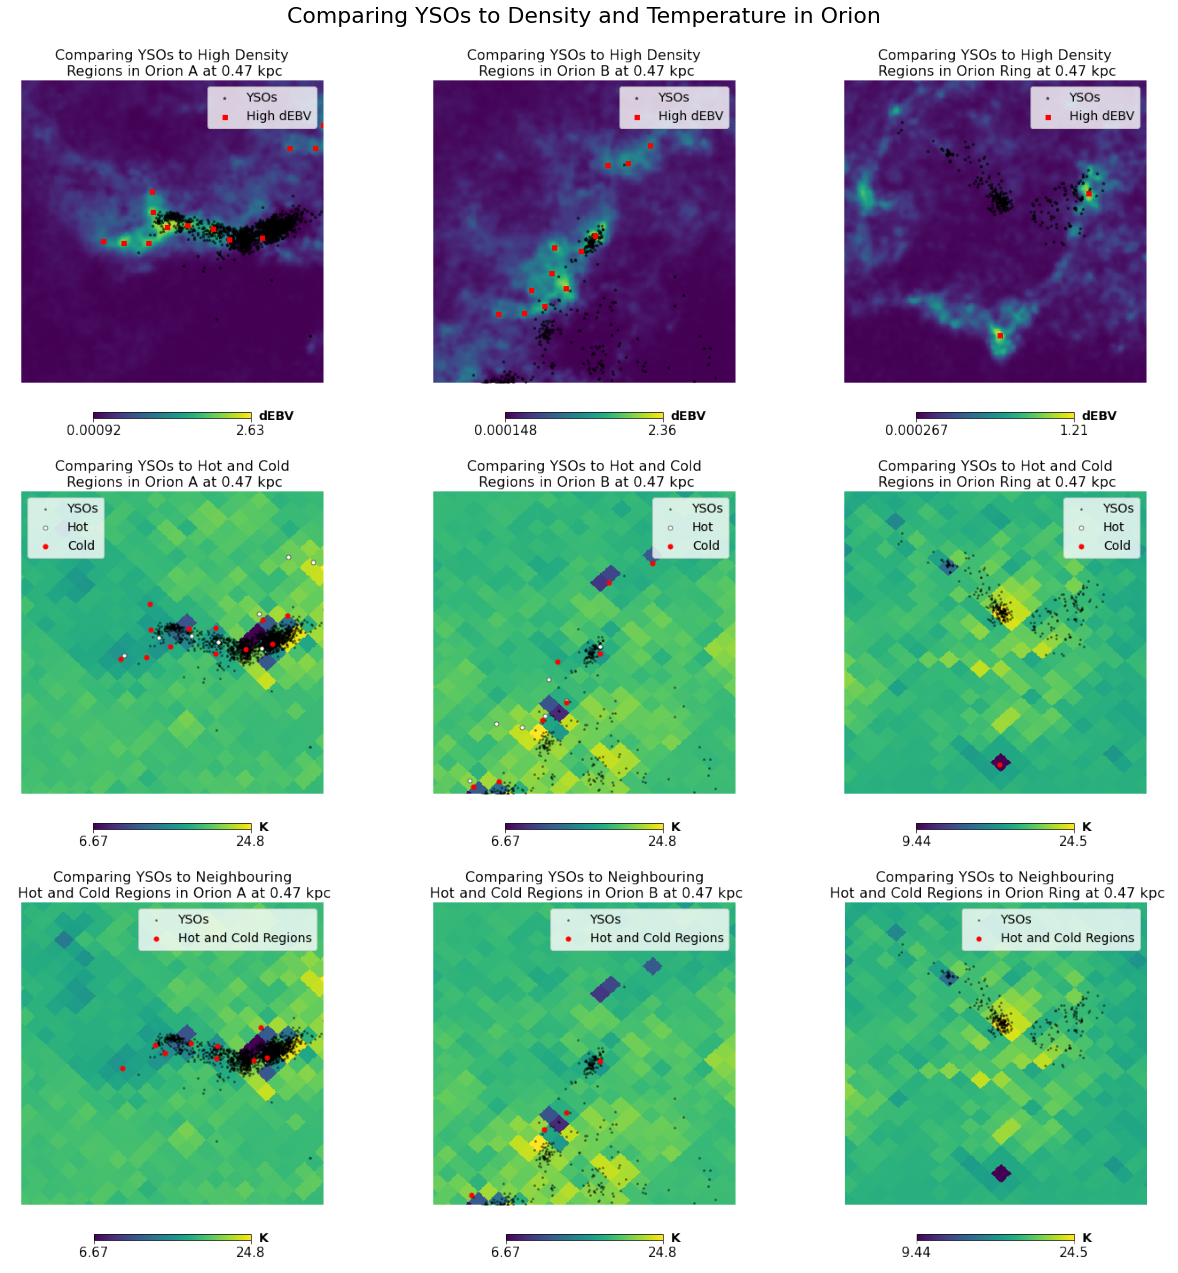

In [59]:
#Make panel comparing ysos and flagged regions for Orion

orion_x_ysos_imgs = ['OrionA_dens', 'OrionB_dens', 'OrionRing_dens', 'OrionA_temp', 'OrionB_temp', 'OrionRing_temp', 
                     'OrionA_bothtemp', 'OrionB_bothtemp', 'OrionRing_bothtemp']
orion_x_ysos_panel_save = YSOs_path + '/OrionAndYSOs_panel.png'
orion_x_ysos_panel_title = 'Comparing YSOs to Density and Temperature in Orion'
vf.create_panel([3,3], (18,18), YSOs_path, orion_x_ysos_imgs, orion_x_ysos_panel_title, filename = orion_x_ysos_panel_save)

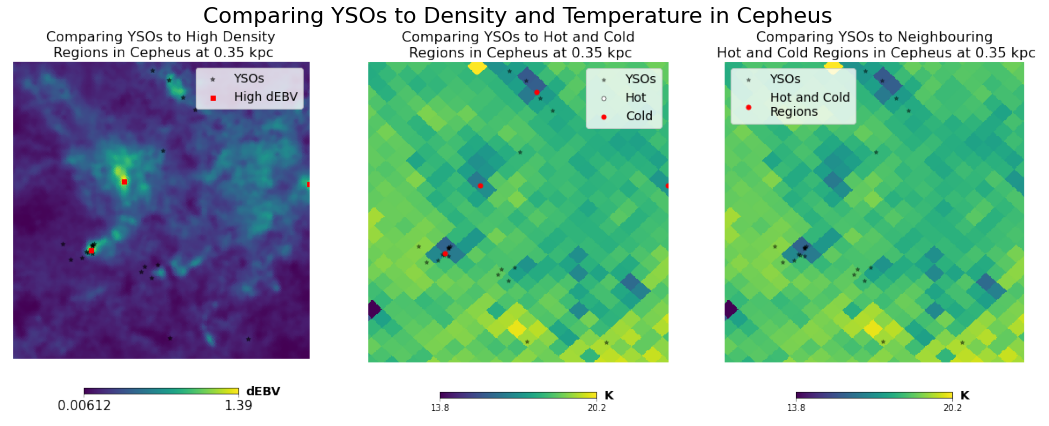

In [64]:
#Now do same thing for cepheus

#dEBV
ceph_ysos_x_dEBV_title = 'Comparing YSOs to High Density' + '\n' + ' Regions in Cepheus at ' + '{:.2f}'.format(distslices[d_ceph]) + ' kpc'
hp.gnomview(dEBV[d_ceph], rot=[l_ceph, b_ceph], xsize=400, ysize=400, nest=True, title=ceph_ysos_x_dEBV_title, cbar=True, notext=True, unit=dEBV_unit)
hp.projscatter(l_kysos_wdist[d_ceph], b_kysos_wdist[d_ceph], lonlat=True, alpha=0.5, c='black', marker='*', s=25)
hp.projscatter(highdEBV_centers[d_ceph][:,0], highdEBV_centers[d_ceph][:,1], c='red', marker='s', s=25)
plt.title(ceph_ysos_x_dEBV_title, fontsize=16)
plt.legend(['YSOs', 'High dEBV'], fontsize=14)
cbar = plt.gcf().axes[-1] #Increase size of color bar
cbar.tick_params(labelsize=15)
plt.savefig(YSOs_path + '/Cepheus_dens.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

#Hot and Cold
ceph_ysos_x_T_title = 'Comparing YSOs to Hot and Cold' + '\n' + ' Regions in Cepheus at ' + '{:.2f}'.format(distslices[d_ceph]) + ' kpc'
hp.gnomview(Ts_new[d_ceph], rot=[l_ceph, b_ceph], xsize=400, ysize=400, nest=True, title=ceph_ysos_x_T_title, cbar=True, notext=True, unit=temp_unit)
hp.projscatter(l_kysos_wdist[d_ceph], b_kysos_wdist[d_ceph], lonlat=True, alpha=0.4, c='black', marker='*', s=20)
hp.projscatter(blue_centers[d_ceph][:,0], blue_centers[d_ceph][:,1], c='white', edgecolor='black', linewidth = 0.5, facecolors='none', 
               marker='o', s=25)
hp.projscatter(red_centers[d_ceph][:,0], red_centers[d_ceph][:,1], c='red', facecolors='none', marker='o', s=25)
plt.title(ceph_ysos_x_T_title, fontsize=16)
plt.legend(['YSOs', 'Hot', 'Cold'], fontsize=14)
plt.savefig(YSOs_path + '/Cepheus_temp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

#Neighbouring Hot and Cold
ceph_ysos_x_Tclose_title = 'Comparing YSOs to Neighbouring' + '\n' + ' Hot and Cold Regions in Cepheus at ' + '{:.2f}'.format(distslices[d_ceph]) + ' kpc'
hp.gnomview(Ts_new[d_ceph], rot=[l_ceph, b_ceph], xsize=400, ysize=400, nest=True, title=ceph_ysos_x_Tclose_title, cbar=True, notext=True, unit=temp_unit)
hp.projscatter(l_kysos_wdist[d_ceph], b_kysos_wdist[d_ceph], lonlat=True, alpha=0.4, c='black', marker='*', s=20)
hp.projscatter(close_RandB[d_ceph][:,0], close_RandB[d_ceph][:,1], c='red', marker='o', s=25)
plt.title(ceph_ysos_x_Tclose_title, fontsize=16)
plt.legend(['YSOs', 'Hot and Cold' + '\n' + 'Regions'], fontsize=14)
plt.savefig(YSOs_path + '/Cepheus_bothtemp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

#Make Panel
ceph_x_ysos_panel_title = 'Comparing YSOs to Density and Temperature in Cepheus'
ceph_x_ysos = ['Cepheus_dens', 'Cepheus_temp', 'Cepheus_bothtemp']
ceph_x_ysos_panel_save = YSOs_path + '/CepheusAndYSOs_panel.png'
vf.create_panel([1,3], (15,6), YSOs_path, ceph_x_ysos, ceph_x_ysos_panel_title, filename = ceph_x_ysos_panel_save)


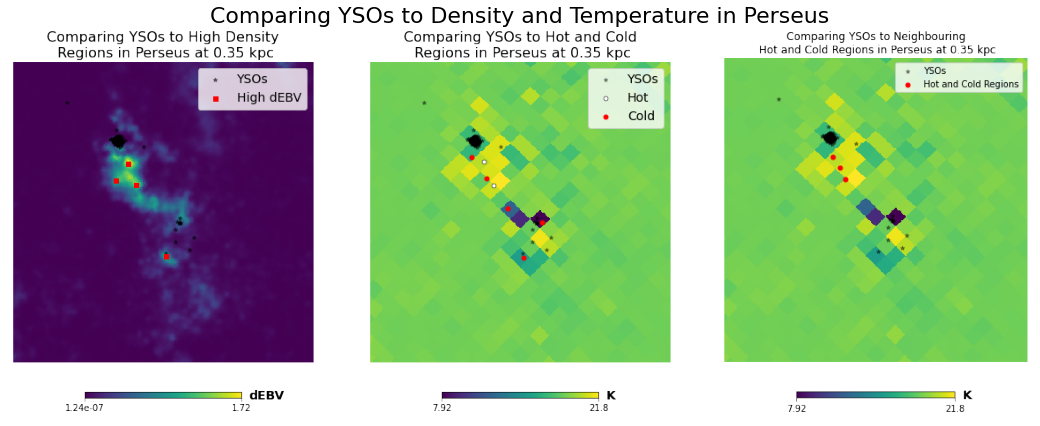

In [65]:
#Perseus

#dEBV
pers_ysos_x_dEBV_title = 'Comparing YSOs to High Density' + '\n' + ' Regions in Perseus at ' + '{:.2f}'.format(distslices[d_perseus]) + ' kpc'
hp.gnomview(dEBV[d_perseus], rot=[l_perseus, b_perseus], xsize=400, ysize=400, nest=True, title=pers_ysos_x_dEBV_title, cbar=True, notext=True, 
            unit=dEBV_unit)
hp.projscatter(l_kysos_wdist[d_perseus], b_kysos_wdist[d_perseus], lonlat=True, alpha=0.5, c='black', marker='*', s=20)
hp.projscatter(highdEBV_centers[d_perseus][:,0], highdEBV_centers[d_perseus][:,1], c='red', marker='s', s=25)
plt.title(pers_ysos_x_dEBV_title, fontsize=16)
plt.legend(['YSOs', 'High dEBV'], fontsize=14)
plt.savefig(YSOs_path + '/Perseus_dens.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

#Hot and Cold
pers_ysos_x_T_title = 'Comparing YSOs to Hot and Cold' + '\n' + ' Regions in Perseus at ' + '{:.2f}'.format(distslices[d_perseus]) + ' kpc'
hp.gnomview(Ts_new[d_perseus], rot=[l_perseus, b_perseus], xsize=400, ysize=400, nest=True, title=pers_ysos_x_T_title, cbar=True, notext=True, 
            unit=temp_unit)
hp.projscatter(l_kysos_wdist[d_perseus], b_kysos_wdist[d_perseus], lonlat=True, alpha=0.4, c='black', marker='*', s=20)
hp.projscatter(blue_centers[d_perseus][:,0], blue_centers[d_perseus][:,1], c='white', edgecolor='black', linewidth = 0.5, facecolors='none', 
               marker='o', s=25)
hp.projscatter(red_centers[d_perseus][:,0], red_centers[d_perseus][:,1], c='red', facecolors='none', marker='o', s=25)
plt.title(pers_ysos_x_T_title, fontsize=16)
plt.legend(['YSOs', 'Hot', 'Cold'], fontsize=14)
plt.savefig(YSOs_path + '/Perseus_temp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

#Neighbouring Hot and Cold
pers_ysos_x_Tclose_title = 'Comparing YSOs to Neighbouring' + '\n' + ' Hot and Cold Regions in Perseus at ' + '{:.2f}'.format(distslices[d_perseus]) + ' kpc'
hp.gnomview(Ts_new[d_perseus], rot=[l_perseus, b_perseus], xsize=400, ysize=400, nest=True, title=pers_ysos_x_Tclose_title, cbar=True, 
            notext=True, unit=temp_unit)
hp.projscatter(l_kysos_wdist[d_perseus], b_kysos_wdist[d_perseus], lonlat=True, alpha=0.4, c='black', marker='*', s=20)
hp.projscatter(close_RandB[d_perseus][:,0], close_RandB[d_perseus][:,1], c='red', marker='o', s=25)
plt.legend(['YSOs', 'Hot and Cold Regions'])
plt.savefig(YSOs_path + '/Perseus_bothtemp.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

#Make Panel
perseus_x_ysos_panel_title = 'Comparing YSOs to Density and Temperature in Perseus'
perseus_x_ysos = ['Perseus_dens', 'Perseus_temp', 'Perseus_bothtemp']
perseus_x_ysos_panel_save = YSOs_path + '/PerseusAndYSOs_panel.png'
vf.create_panel([1,3], (15,6), YSOs_path, perseus_x_ysos, perseus_x_ysos_panel_title, filename = perseus_x_ysos_panel_save)